In [53]:
#Import necessary libraries

#for data analysis
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#data for pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [54]:
#load dataset
df = pd.read_csv(r"C:\Users\adewu\Downloads\10NALYTICS\ML\SUPERVISED\WMDI\Heart.csv")
df.head()
                

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [55]:
#for better understanding and flow of the analysis, rename some of the columns
df.columns= ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
#Data verification - data type, number of features and rows, missing data etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [57]:
#statistical analysis of data
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


<Axes: >

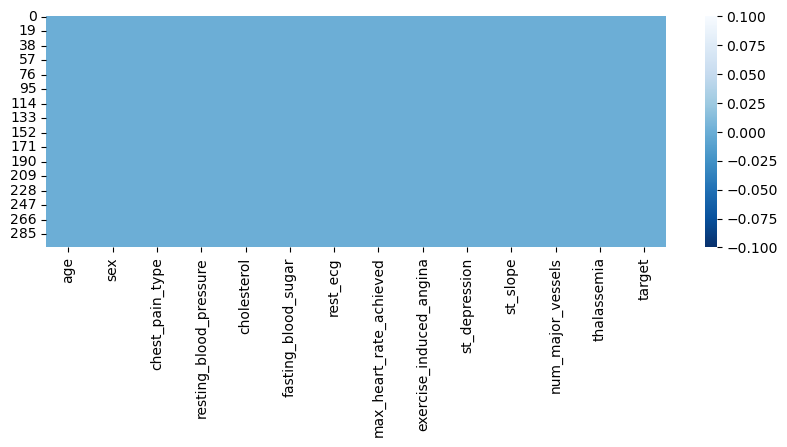

In [58]:
#checking for missing values
print(df.isnull().sum())


#visualizing the missing data
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

## Exploratory Data Analysis

### Univariate Analysis

In [61]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<Axes: xlabel='thalassemia'>

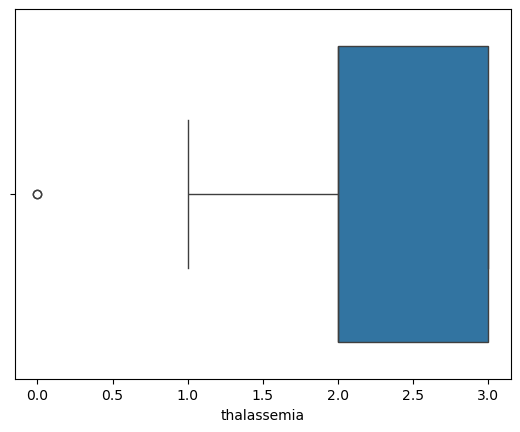

In [62]:
#check for outliers
sns.boxplot(x=df["thalassemia"])

<Axes: xlabel='cholesterol'>

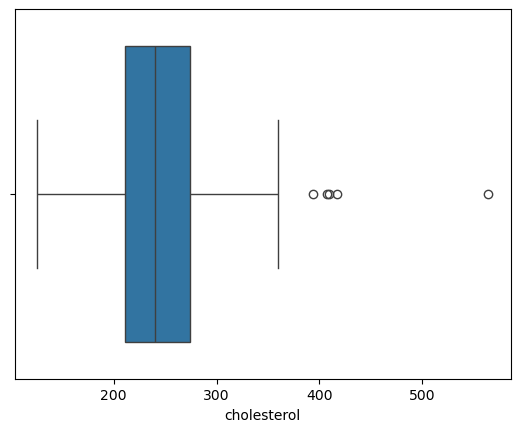

In [63]:
#check for outliers
sns.boxplot(x=df["cholesterol"])

<Axes: xlabel='resting_blood_pressure'>

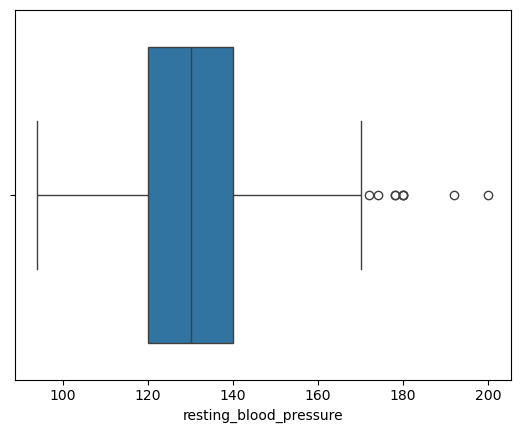

In [64]:
#check for outliers
sns.boxplot(x=df["resting_blood_pressure"])

<Axes: xlabel='max_heart_rate_achieved'>

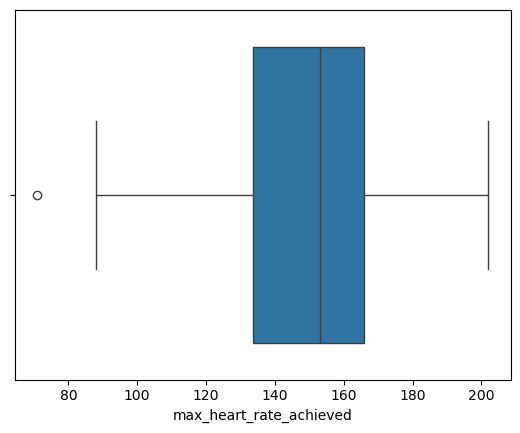

In [65]:
#check for outliers
sns.boxplot(x=df["max_heart_rate_achieved"])

Text(0.5, 1.0, 'Total Number of Patients')

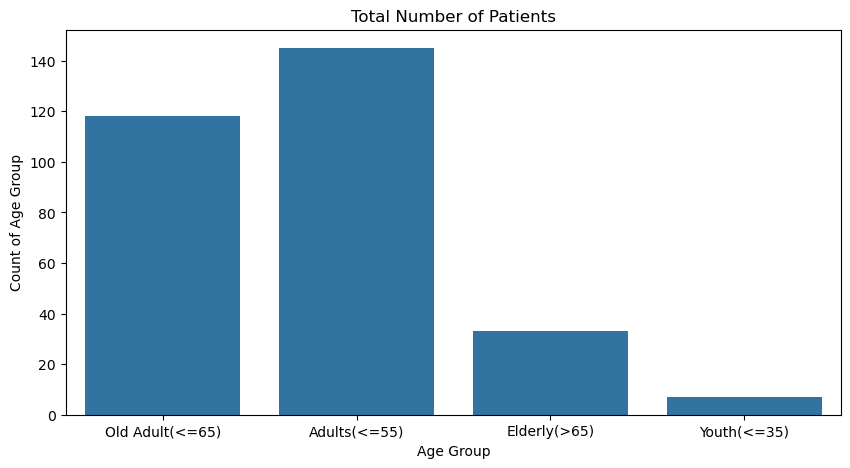

In [66]:
#Data Visualization
#Age Bracket
def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adults(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"

df['age_bracket'] = df['age'].apply(age_bracket)

#Investigating the age group of patients
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df)
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of Patients')

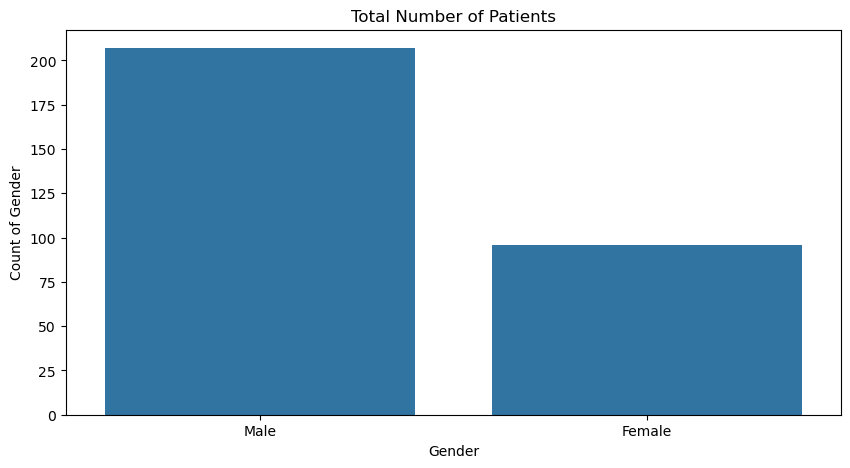

In [67]:
#Data Visualization
#Sex
def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"

df['gender'] = df['sex'].apply(gender)

#Investigating the gender of patients
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.title('Total Number of Patients')

Text(0.5, 1.0, 'Total Number of chest pain types')

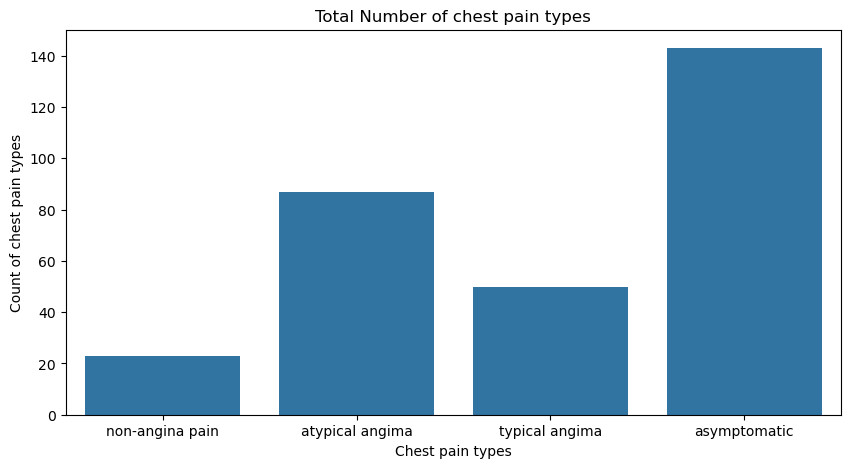

In [68]:
#Data Visualization
#chest pain(1: typical angina, 2:atypical angima, 3:nonangina pain, asymtomatic)
def chest_pain(cp):
    if cp == 1:
        return "typical angima"
    elif cp == 2:
        return "atypical angima"
    elif cp == 3:
        return "non-angina pain"
    else:
        return "asymptomatic"

df['cp_cat'] = df['chest_pain_type'].apply(chest_pain)

#Investigating the gender of patients
plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat', data=df)
plt.xlabel('Chest pain types')
plt.ylabel('Count of chest pain types')
plt.title('Total Number of chest pain types')

In [69]:
df.head(2)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-angina pain
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adults(<=55),Male,atypical angima


Text(0.5, 1.0, 'Total Number of Target')

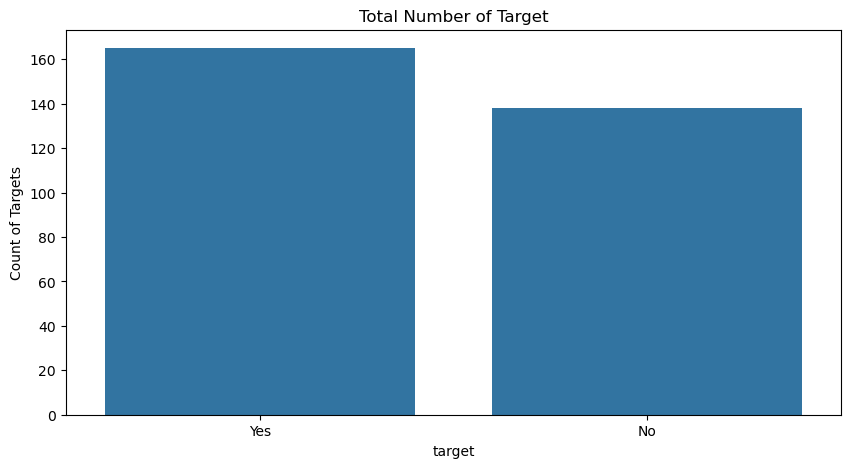

In [70]:
#Data Visualization
#Target- habe disease or not (1-yes,0-no)
def label(tgt):
    if tgt == 1:
        return "Yes"
    else:
        return "No"

df['label'] = df['target'].apply(label)

#Investigating the gender of patients
plt.figure(figsize=(10,5))
sns.countplot(x='label', data=df)
plt.xlabel('target')
plt.ylabel('Count of Targets')
plt.title('Total Number of Target')

### Bivariate Analysis

Text(0.5, 1.0, 'Total number of patient')

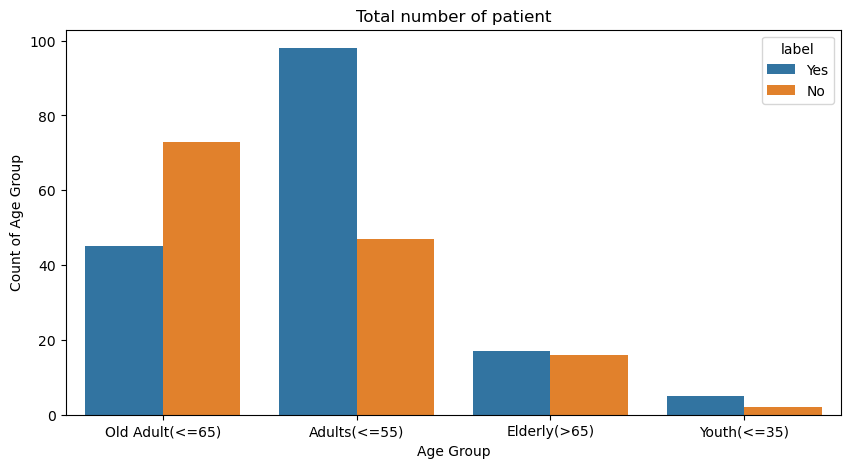

In [72]:
#Investigating the age group by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=df,hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total number of patient')

Text(0.5, 1.0, 'Total number Patient Gender')

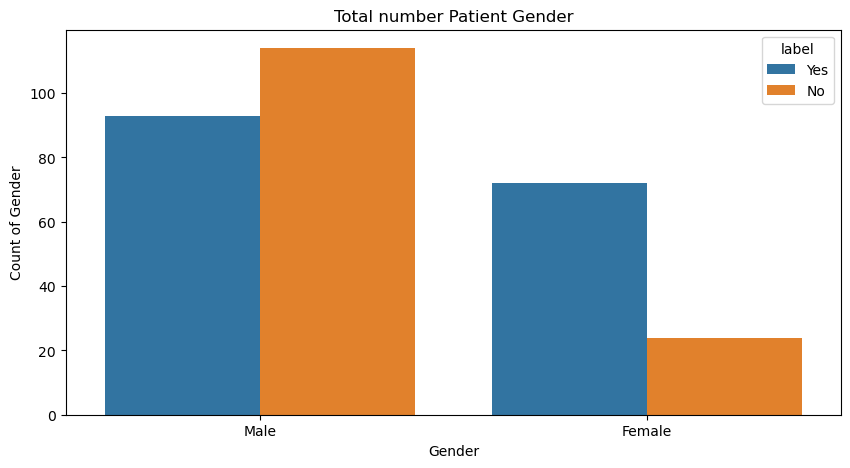

In [73]:
#Investigating the gender of patients by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x='gender', data=df,hue='label')
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.title('Total number Patient Gender')

##### Males are rampant with heart disease than the females.

Text(0.5, 1.0, 'Total number of Chest Pain Types')

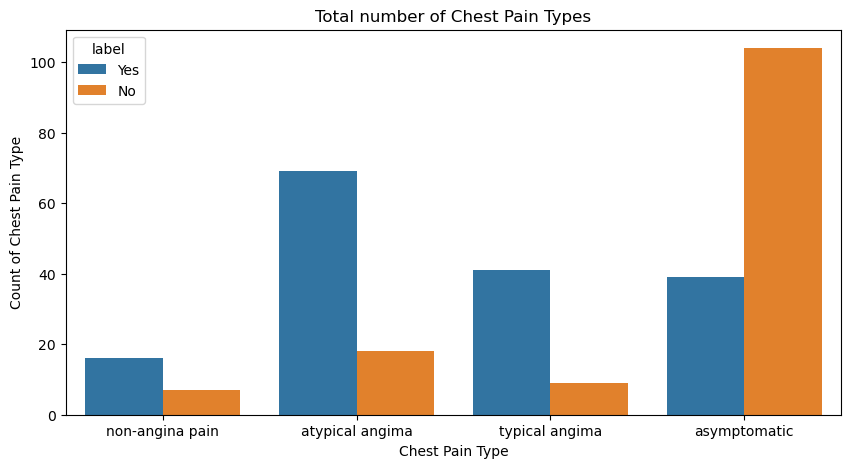

In [75]:
#Investigating the chest pain type by the target feature
plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat', data=df,hue='label')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count of Chest Pain Type')
plt.title('Total number of Chest Pain Types')

###### more people with heart disease have a Atypical chest pain type and most people with no heart disease, have the Asymptomatic chest pain type

##### Multivariate Analysis

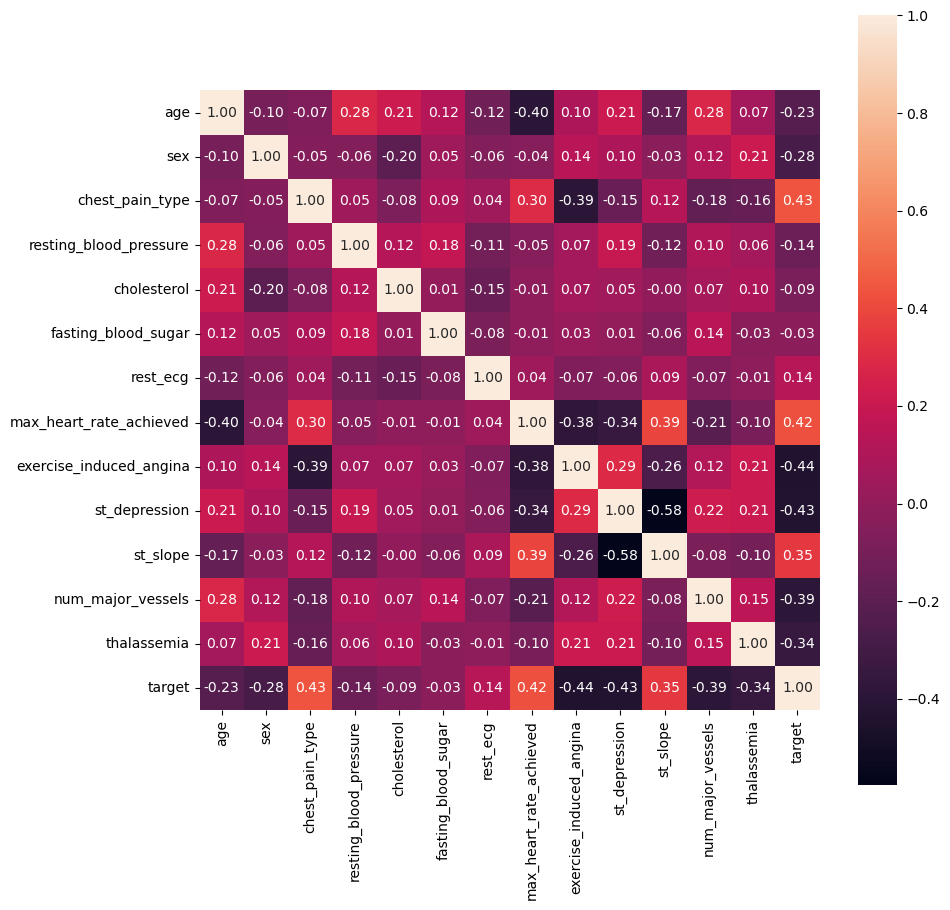

In [78]:
#correlation Target and other features in the data
plt.figure(figsize=(10,10))
df_corr = df.select_dtypes(include=['number']).corr()
hm = sns.heatmap(df_corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10})

##### exercise_induced_angina and st_depression has astrong but not so string correlation with the target feature. followed by max_heart_rate_achieved feature. 

## Feature Engineering/Data Preprocessing

In [107]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-angina pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adults(<=55),Male,atypical angima,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adults(<=55),Female,typical angima,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angima,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Yes


In [109]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target', 'age_bracket',
       'gender', 'cp_cat', 'label'],
      dtype='object')

In [111]:
#create a copy of the data (Exclude target/label alongside other columns that was created)
df1 = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia']]

label = df[['target']]

In [113]:
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [115]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [119]:
df1.dtypes
#confirm the datatypes, if object, change to numerical data type

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [121]:
#Dealing with outliers
#Normalize the data
scaler = MinMaxScaler()

df1['scaled_RBP'] = scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1,1))
df1['scaled_chol'] = scaler.fit_transform(df1['cholesterol'].values.reshape(-1,1))
df1['scaled_thal'] = scaler.fit_transform(df1['thalassemia'].values.reshape(-1,1))
df1['scaled_max_heart_rate'] = scaler.fit_transform(df1['max_heart_rate_achieved'].values.reshape(-1,1))

df1.drop(['resting_blood_pressure', 'cholesterol','thalassemia','max_heart_rate_achieved'], axis=1, inplace=True)

df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,scaled_RBP,scaled_chol,scaled_thal,scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


##### Machine Learning

In [123]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [131]:
X_train.head(3)

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,scaled_RBP,scaled_chol,scaled_thal,scaled_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153


In [133]:
y_train.head(3)

,target
132,1
202,0
196,0


In [139]:
#Model Building
#Logistic regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print('Logistic Regression')
print("Accuracy:", accuracy_score(y_test,ly_pred))
print("Precision:", precision_score(y_test,ly_pred))
print("Recall:", recall_score(y_test,ly_pred))
print("F1-score:", f1_score(y_test,ly_pred))
print("AUC-ROC:", roc_auc_score(y_test,ly_pred))

Logistic Regression
Accuracy: 0.8688524590163934
Precision: 0.875
Recall: 0.875
F1-score: 0.875
AUC-ROC: 0.8685344827586206


The logistic regression model was 86 percent accurate.

In [141]:
ly_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [143]:
y_test

,target
179,0
228,0
111,1
246,0
60,1
...,...
249,0
104,1
300,0
193,0


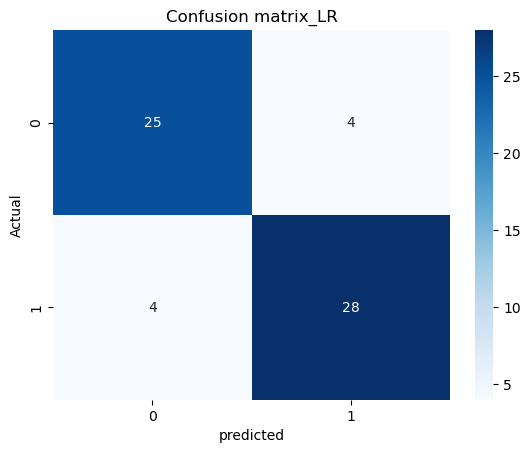

In [145]:
#Confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

#visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix_LR")
plt.show()

#### this confusion matrix shows; 25 features was predicted accurately to have heart disease and 4 were wrongly predicted, to have heart disease. Also, 28 were predicted accurately to not have heart disease, while 4 were wrongly predicted not to have heart disease.

In [150]:
#Model Building
#Random Forest

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfy_pred = rfc.predict(X_test)

print('Random Forest')
print("Accuracy:", accuracy_score(y_test,rfy_pred))
print("Precision:", precision_score(y_test,rfy_pred))
print("Recall:", recall_score(y_test,rfy_pred))
print("F1-score:", f1_score(y_test,rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test,rfy_pred))

Random Forest
Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
F1-score: 0.8615384615384616
AUC-ROC: 0.8512931034482758


#### The random forest model was 85 percent accurate.

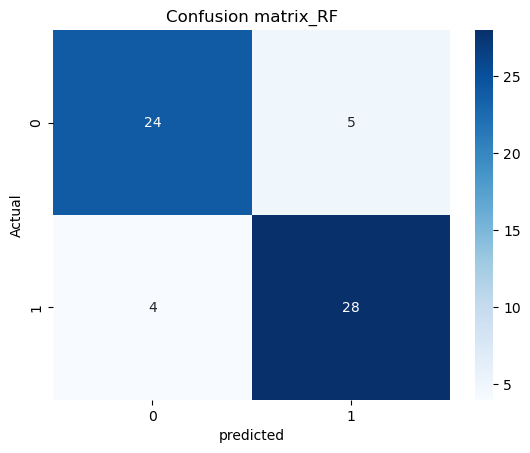

In [154]:
#Confusion matrix
rfcm = confusion_matrix(y_test, rfy_pred)

#visualize the confusion matrix
sns.heatmap(rfcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix_RF")
plt.show()

#### this confusion matrix shows; 24 people was predicted accurately to have heart disease and 5 were wrongly predicted, to have heart disease. Also, 28 were predicted accurately not to have heart disease, while 4 were wrongly predicted not to have heart disease.

In [161]:
#Machine Learning Algorithms will be applied to the dataset
classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbors'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Bayes'],
               [DecisionTreeClassifier(random_state=42), 'Decision Tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]

In [167]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbors'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTreeC

In [223]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}
cfm_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]

    pred = model.predict(X_test)

    #metrics
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred)
    cfm = confusion_matrix(y_test,pred)

    #storing metrics
    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])
    cfm_list[model_name] = cfm

    if model_name != classifiers[-1][1]:
        print('')

In [197]:
acc_list

{'XGB Classifier': ['81.97%'],
 'Random Forest': ['81.97%'],
 'K-Nearest Neighbors': ['75.41%'],
 'SGD Classifier': ['73.77%'],
 'SVC': ['65.57%'],
 'Naive Bayes': ['86.89%'],
 'Decision Tree': ['85.25%'],
 'Logistic Regression': ['86.89%']}

In [187]:
#put the acc_list into a table
print("Accuracy Score")
sl = pd.DataFrame(acc_list)
sl.head()

Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,81.97%,86.89%,75.41%,68.85%,65.57%,86.89%,85.25%,86.89%


##### RF, LR and NB perfomed well in terms of accuracy. SVC has the lowest accuracy.

In [191]:
#put the acc_list into a table
print("Precision Score")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,86.21%,85.29%,79.31%,63.27%,65.71%,90.0%,92.59%,87.5%


##### Decision tree had the highest precion

In [193]:
print("Recall Score")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,78.12%,90.62%,71.88%,96.88%,71.88%,84.38%,78.12%,87.5%


In [199]:
print("ROC Score")
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,82.17%,82.0%,75.59%,74.68%,65.25%,87.02%,85.61%,86.85%


In [237]:
print("Confusion Matrix")
for model_name, cfm in cfm_list.items():
    print(f"{model_name}:\n{cfm}\n")

Confusion Matrix
XGB Classifier:
[[25  4]
 [ 7 25]]

Random Forest:
[[24  5]
 [ 5 27]]

K-Nearest Neighbors:
[[23  6]
 [ 9 23]]

SGD Classifier:
[[26  3]
 [ 4 28]]

SVC:
[[17 12]
 [ 9 23]]

Naive Bayes:
[[26  3]
 [ 5 27]]

Decision Tree:
[[27  2]
 [ 7 25]]

Logistic Regression:
[[25  4]
 [ 4 28]]



##### Decision Tree perofrmed best